<h1 style="color: lightblue;font-family: Georgia, serif;">Análisis de datos y resultados: Titanic</h1>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df_titanic= pd.read_csv("./data/titanic.csv")

In [44]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [6]:
#TRATAR NULOS
#age
es_woman=df_titanic.who=="woman"
es_child = df_titanic.who =="child"
es_man = df_titanic.who =="man"

media_woman = df_titanic.loc[es_woman, "age"].mean()
media_child = df_titanic.loc[es_child, "age"].mean()
media_man = df_titanic.loc[es_man, "age"].mean()

es_age_nulo = df_titanic.age.isna()

df_titanic.loc[es_woman & es_age_nulo, "age"] = media_woman
df_titanic.loc[es_man & es_age_nulo, "age"] = media_man
df_titanic.loc[es_child & es_age_nulo, "age"] = media_child

#embarked y embark_town
for col in ["embarked", "embark_town"]:
    df_titanic[col] = df_titanic[col].fillna(df_titanic[col].mode()[0])

#deck
df_titanic.drop(columns="deck", inplace=True)

### 1. Tasa mortalidad
*El titanic fue un accidente con una tasa de mortalidad alta*

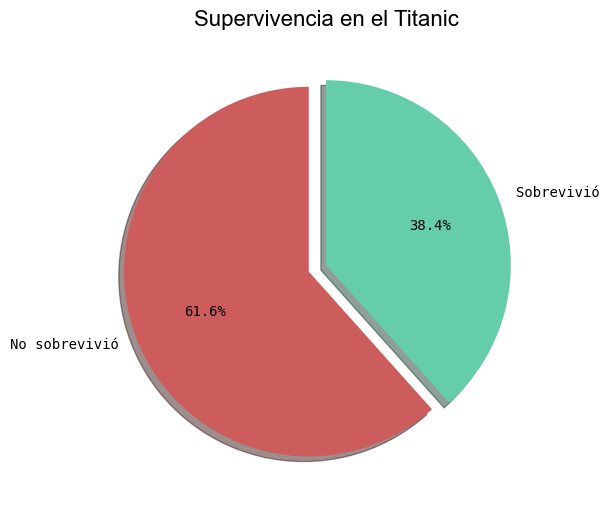

In [69]:
sizes = df_titanic['survived'].value_counts().sort_index()  # 0 primero (no sobrevivió), luego 1 (sí sobrevivió)
explode = (0.1, 0) 

# Gráfico
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(sizes, explode=explode, labels=['No sobrevivió', 'Sobrevivió'], autopct='%1.1f%%',
       shadow=True, startangle=90, colors=['indianred', 'mediumaquamarine'], textprops={'fontfamily': 'monospace'})
ax.set_title('Supervivencia en el Titanic', fontdict={'family': 'Arial', 'size': 16})

#Guardar
plt.savefig('slide1_mortalidad.png',  bbox_inches='tight')

#Mostrar
plt.show()

### 2. Mujeres y niños primero
*En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...* 

[Bar of pie](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/bar_of_pie.html#sphx-glr-gallery-pie-and-polar-charts-bar-of-pie-py)

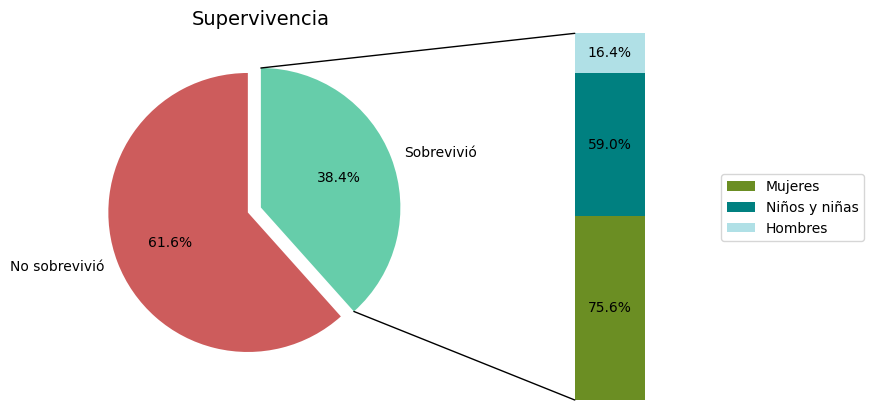

In [66]:
from matplotlib.patches import ConnectionPatch

# --- Preparar figura y ejes
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# --- Gráfico de pastel
sizes = df_titanic['survived'].value_counts().sort_index()  # [No sobrevivió, Sobrevivió]
explode = (0.1, 0)

ax1.pie(
    sizes,
    explode=explode,
    labels=['No sobrevivió', 'Sobrevivió'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['indianred', 'mediumaquamarine'],
)
ax1.set_title('Supervivencia', fontsize=14)

# --- Gráfico de barras apiladas
xpos = 0
bottom = 0

# Orden
order = ['woman', 'child', 'man']
ratios = (
    df_titanic
    .groupby("who")["alive"]
    .value_counts(normalize=True)
    .loc[order, "yes"]  # selecciona solo columna "yes" y reordena
)

width = 0.2
colors = ['olivedrab', 'teal', 'powderblue']

# Dibujar barras
for j, (label, height) in enumerate(ratios.items()):
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + height / 2
    ax2.text(
        xpos, ypos, f"{height*100:.1f}%", 
        ha='center', va='center', color='black', fontsize=10)
    bottom += height

ax2.legend(["Mujeres", "Niños y niñas", "Hombres"], loc='center left',  bbox_to_anchor=(0.8, 0.5))
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[1].theta1, ax1.patches[1].theta2
center, r = ax1.patches[1].center, ax1.patches[1].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

#Guardar
plt.savefig('slide2_mujeresyniños.png')

#Mostrar
plt.show()



### 3. Influencia de la clase
*La clase en la que se viaje tuvo una influencia significativa y podría explicar...*

In [113]:
def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 5):
    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    # Si hay más de size_group categorías en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
        # Crea el gráfico para menos de size_group categorías
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, palette= ['indianred', 'mediumaquamarine'], data=count_data)
    new_labels = ['No', 'Sí']
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, new_labels, title='Superviviente')

    # Añade títulos y etiquetas
    plt.title("Influencia de la clase")
    plt.xlabel("Clase")
    plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
    plt.xticks(rotation=45, ticks=[0,1,2], labels=["Primera", "Segunda", "Tercera"])
    


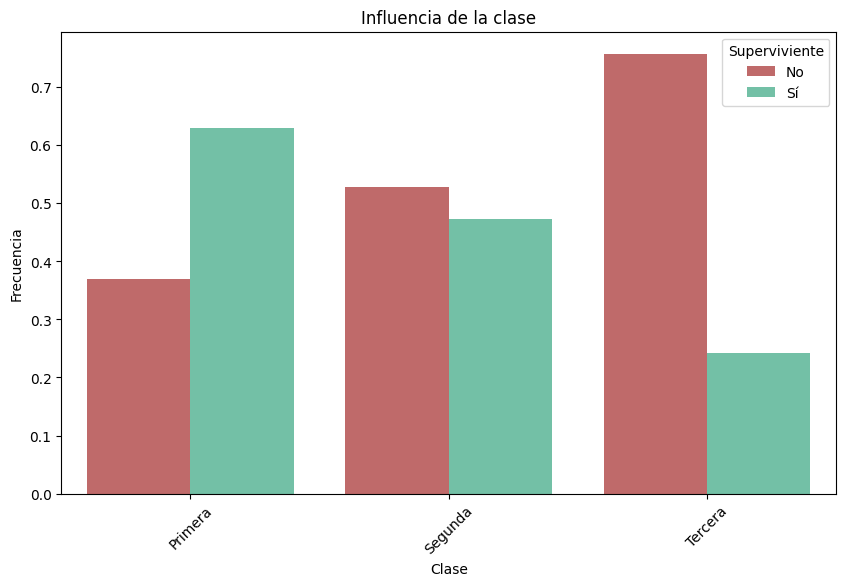

In [114]:
plot_categorical_relationship_fin(df_titanic, "class", "alive", relative_freq=True, show_values=True)

#Guardar
plt.savefig('slide3_influenciaclase.png')

#Mostrar
plt.show()

### 4. Diferencias tasas supervivencia
*... las diferencias de tasas de supervivencia entre mujeres y niños.*

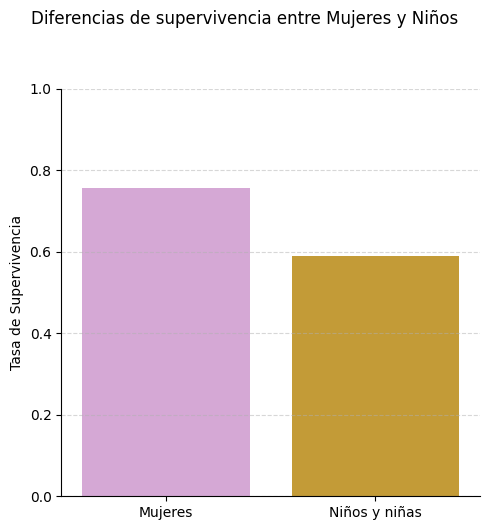

In [137]:
# Filtrar solo mujeres y niños
df_mujeres_niños = df_titanic[df_titanic['who'].isin(['woman', 'child'])]

# Crear el catplot
g = sns.catplot(
    data=df_mujeres_niños,
    x='who', 
    y='survived', 
    hue= 'who',
    legend=False,
    kind='bar',
    order=['woman', 'child'],
    palette=['plum', 'goldenrod'],
    errorbar=None
)

g.set_axis_labels("", "Tasa de Supervivencia")
g.set_titles("")
g.set(ylim=(0, 1))
g.set_xticklabels(["Mujeres", "Niños y niñas"])
g.fig.suptitle('Diferencias de supervivencia entre Mujeres y Niños', y=1.05)
g.ax.grid(axis='y', linestyle='--', alpha=0.5)

#Guardar
plt.tight_layout()
plt.savefig('slide4.1_mujeres_niños.png')

#Mostrar
plt.show()

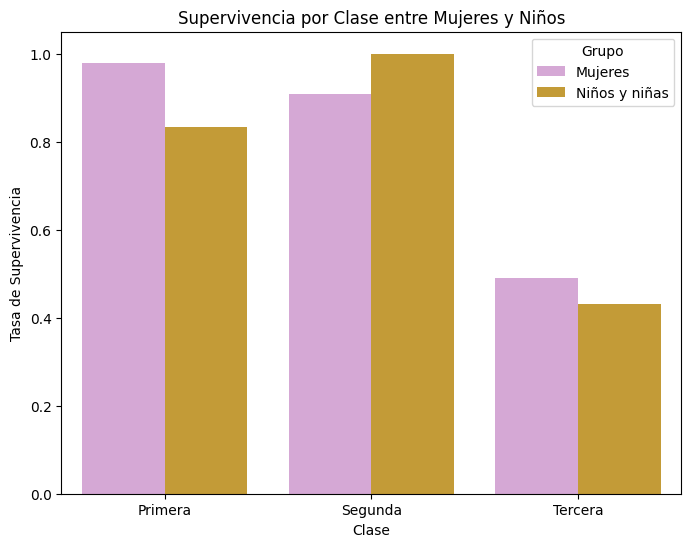

In [136]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_titanic[df_titanic['who'].isin(['woman', 'child'])],
    x='class', 
    y='survived', 
    hue='who', 
    palette= ["plum","goldenrod"],
    order=['First', 'Second', 'Third'],
    errorbar=None
)
plt.xlabel('Clase')
plt.ylabel('Tasa de Supervivencia')
plt.title('Supervivencia por Clase entre Mujeres y Niños')
plt.xticks(ticks=[0,1,2], labels=["Primera", "Segunda", "Tercera"])
plt.legend(title='Grupo', labels= ["Mujeres", "Niños y niñas"])

#Guardar
plt.savefig('slide4.2_clase_mujeresyniños.png')

#Mostrar
plt.show()

### 5. Puerto de embarque y pasaje
*Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.* 

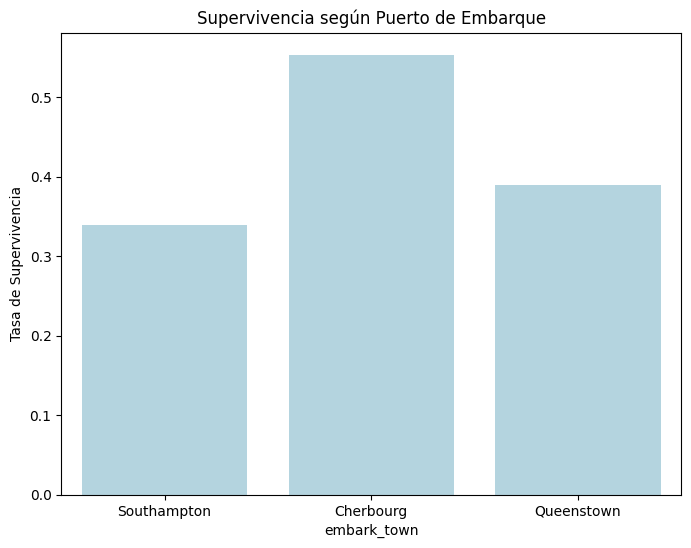

In [148]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_titanic, x='embark_town', y='survived', errorbar=None, color='lightblue')
plt.ylabel('Tasa de Supervivencia')
plt.title('Supervivencia según Puerto de Embarque')

#Guardar
plt.savefig('slide5.1_puerto.png')

#Mostrar
plt.show()

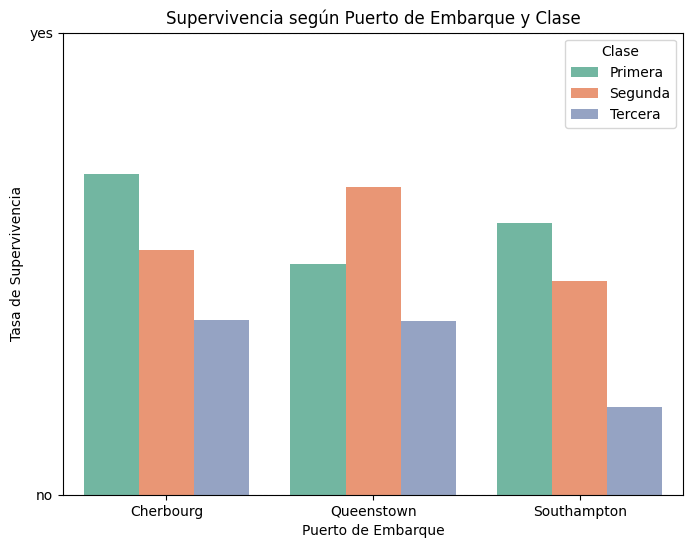

In [177]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_titanic,
    x='embarked',
    y='alive',
    hue='class', 
    hue_order=['First', 'Second', 'Third'],
    order=['C', 'Q', 'S'],
    palette='Set2',
    errorbar=None
)

plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Puerto de Embarque')
plt.title('Supervivencia según Puerto de Embarque y Clase')
plt.xticks(ticks=[0,1,2], labels=['Cherbourg', 'Queenstown', 'Southampton'])
plt.ylim(0,1)
plt.legend(title='Clase', labels= ["Primera", "Segunda", "Tercera"])
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Guardar
plt.savefig('slide5.2_claseypuerto.png')

#Mostrar
plt.show()